In [1]:
#import libraries
library(dplyr)
library(Seurat)
library(patchwork)
library(cowplot)
library (ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘cowplot’

The following object is masked from ‘package:patchwork’:

    align_plots



In [7]:
#Upload data

GSE<-(readRDS('/media/reuschenbach/Data/Masterthesis/MouseData/GSE60361_Mouse_Zeisel_Linnarsson_Science_2015_WT_scRNA.rds'))

In [4]:
#organized data
#NGSE<-readRDS("/media/reuschenbach/Data/Masterthesis/MouseData/PreProcessed/JosiOrganizedSubset_MouseZeiselLinnarsson2015.rds")

In [9]:
GSE

An object of class Seurat 
19972 features across 3005 samples within 1 assay 
Active assay: RNA (19972 features, 0 variable features)

In [10]:
NGSE

An object of class Seurat 
19972 features across 3005 samples within 1 assay 
Active assay: RNA (19972 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [ ]:
## ORGANIZE metdata
# sort out unwanted metadata 
# add other missing info such as Study type for later merging

In [8]:
# Create a new metadata column called "CellType" 
GSE$CellType <- GSE$level1class
# Remove the "oupSample.." metadata column
GSE$level1class <- NULL
# Quickly preview the metadata again
head(GSE@meta.data)

orig.ident nCount_RNA nFeature_RNA group # total mRNA mol well sex
sscortex   Zeisel2015 21580      4848         1       21580          11   1  
sscortex.1 Zeisel2015 21748      4685         1       21748          95   -1 
sscortex.2 Zeisel2015 31642      6028         1       31642          33   -1 
sscortex.3 Zeisel2015 32914      5824         1       32916          42   1  
sscortex.4 Zeisel2015 21530      4701         1       21531          48   1  
sscortex.5 Zeisel2015 24797      5408         1       24799          13   -1 
           age diameter cell_id        level2class CellType    
sscortex   21  0        1772071015_C02 Int10       interneurons
sscortex.1 20  9.56     1772071017_G12 Int10       interneurons
sscortex.2 20  11.1     1772071017_A05 Int6        interneurons
sscortex.3 21  11.7     1772071014_B06 Int10       interneurons
sscortex.4 25  11       1772067065_H06 Int9        interneurons
sscortex.5 20  11.9     1772071017_E02 Int9        interneurons

In [6]:
unique(GSE$orig.ident)
unique(GSE$CellType)
unique(GSE$level2class)
unique(GSE$'group #')

[1] Zeisel2015
Levels: Zeisel2015

[1] interneurons         pyramidal SS         pyramidal CA1       
[4] oligodendrocytes     microglia            endothelial-mural   
[7] astrocytes_ependymal
9 Levels: (none) astrocytes_ependymal endothelial-mural ... pyramidal SS

[1] Int10     Int6      Int9      Int2      Int4      Int1      Int3     
 [8] Int13     Int16     Int14     Int11     Int5      Int7      Int8     
[15] Int12     Int15     (none)    S1PyrL4   ClauPyr   S1PyrL5   S1PyrL23 
[22] S1PyrDL   S1PyrL5a  SubPyr    CA1Pyr1   S1PyrL6b  S1PyrL6   CA1Pyr2  
[29] CA1PyrInt CA2Pyr2   Oligo1    Oligo3    Oligo4    Oligo2    Oligo6   
[36] Oligo5    Mgl1      Mgl2      Pvm1      Pvm2      Vsmc      Vend2    
[43] Peric     Vend1     Astro2    Astro1    Choroid   Epend    
49 Levels: (none) Astro1 Astro2 CA1Pyr1 CA1Pyr2 CA1PyrInt CA2Pyr2 ... Vsmc

[1] 1 2 3 4 5 6 7 8 9
Levels:  1 2 3 4 5 6 7 8 9 group #

In [5]:
#Setting subset to keep original 
NGSE<-GSE

In [6]:
#Deleting unwanted cols
NGSE$diameter<-NULL
NGSE$well<-NULL
NGSE$'total mRNA mol'<-NULL

#Renaming cols
NGSE$Condition <- NGSE$'group #'
NGSE$Sex<- NGSE$sex
NGSE$Age <-NGSE$age
NGSE$cell_ID <-NGSE$cell_id
NGSE$CellTypeOriginal<- NGSE$level2class
NGSE$CellTypeSubcluster<- NGSE$level2class

# Remove the old col
NGSE$'group #'<-NULL
NGSE$sex<-NULL
NGSE$age<-NULL
NGSE$cell_id<-NULL
NGSE$level2class<-NULL
# Check metadata again
head(x = NGSE[[]])

orig.ident nCount_RNA nFeature_RNA CellType     Condition Sex Age
sscortex   Zeisel2015 21580      4848         interneurons 1         1   21 
sscortex.1 Zeisel2015 21748      4685         interneurons 1         -1  20 
sscortex.2 Zeisel2015 31642      6028         interneurons 1         -1  20 
sscortex.3 Zeisel2015 32914      5824         interneurons 1         1   21 
sscortex.4 Zeisel2015 21530      4701         interneurons 1         1   25 
sscortex.5 Zeisel2015 24797      5408         interneurons 1         -1  20 
           cell_ID        CellTypeOriginal CellTypeSubcluster
sscortex   1772071015_C02 Int10            Int10             
sscortex.1 1772071017_G12 Int10            Int10             
sscortex.2 1772071017_A05 Int6             Int6              
sscortex.3 1772071014_B06 Int10            Int10             
sscortex.4 1772067065_H06 Int9             Int9              
sscortex.5 1772071017_E02 Int9             Int9

In [ ]:
# 'standardize' celltype names (MOL, OLG, NFO) for later merging
# but also keep orginial subcluster

In [7]:
NGSE$CellType <- factor(NGSE$CellType, levels = c( '(none)', 'astrocytes_ependymal', 'endothelial-mural',
                                                  'interneurons', 'level1class', 'microglia', 'oligodendrocytes',
                                                  'pyramidal CA1', 'pyramidal SS'  )
                       , labels = c( 'Other', 'Astro', 'Endo', 'Inter', 'Other', 'MG', 'MOL', 'Neuron', 'Neuron'))

In [8]:
NGSE$CellTypeOriginal <- factor(NGSE$CellTypeOriginal, levels = c( '(none)', 'Astro1', 'Astro2', 'CA1Pyr1', 'CA1Pyr2', 'CA1PyrInt',
                                                                  'CA2Pyr2', 'Choroid', 'ClauPyr', 'Epend', 'Int1', 'Int10', 'Int11',
                                                                  'Int12', 'Int13', 'Int14', 'Int15', 'Int16', 'Int2', 'Int3', 'Int4',
                                                                  'Int5', 'Int6', 'Int7', 'Int8', 'Int9', 'level2class', 'Mgl1', 'Mgl2',
                                                                  'Oligo1', 'Oligo2', 'Oligo3', 'Oligo4', 'Oligo5', 'Oligo6', 'Peric', 
                                                                  'Pvm1', 'Pvm2', 'S1PyrDL', 'S1PyrL23', 'S1PyrL4', 'S1PyrL5', 'S1PyrL5a',
                                                                  'S1PyrL6', 'S1PyrL6b', 'SubPyr', 'Vend1', 'Vend2', 'Vsmc')
                       , labels = c( '(none)', 'Zeisel_Astro1', 'Zeisel_Astro2', 'Zeisel_CA1Pyr1', 'Zeisel_CA1Pyr2', 
                                    'Zeisel_CA1PyrInt', 'Zeisel_CA2Pyr2', 'Zeisel_Choroid', 'Zeisel_ClauPyr', 'Zeisel_Epend', 
                                    'Zeisel_Int1', 'Zeisel_Int10', 'Zeisel_Int11', 'Zeisel_Int12', 'Zeisel_Int13', 'Zeisel_Int14', 
                                    'Zeisel_Int15', 'Zeisel_Int16', 'Zeisel_Int2', 'Zeisel_Int3', 'Zeisel_Int4','Zeisel_Int5', 'Zeisel_Int6',
                                    'Zeisel_Int7', 'Zeisel_Int8', 'Zeisel_Int9', 'Zeisel_level2class', 'Zeisel_Mgl1', 'Zeisel_Mgl2', 
                                    'Zeisel_Oligo1', 'Zeisel_Oligo2', 'Zeisel_Oligo3', 'Zeisel_Oligo4', 'Zeisel_Oligo5', 'Zeisel_Oligo6', 
                                    'Zeisel_Peric', 'Zeisel_Pvm1', 'Zeisel_Pvm2', 'Zeisel_S1PyrDL', 'Zeisel_S1PyrL23', 'Zeisel_S1PyrL4', 
                                    'Zeisel_S1PyrL5', 'Zeisel_S1PyrL5a', 'Zeisel_S1PyrL6', 'Zeisel_S1PyrL6b', 'Zeisel_SubPyr', 'Zeisel_Vend1',
                                    'Zeisel_Vend2', 'Zeisel_Vsmc'))

In [9]:
NGSE$CellTypeSubcluster <- factor(NGSE$CellTypeSubcluster, levels = c( '(none)', 'Astro1', 'Astro2', 'CA1Pyr1', 'CA1Pyr2', 'CA1PyrInt',
                                                                  'CA2Pyr2', 'Choroid', 'ClauPyr', 'Epend', 'Int1', 'Int10', 'Int11',
                                                                  'Int12', 'Int13', 'Int14', 'Int15', 'Int16', 'Int2', 'Int3', 'Int4',
                                                                  'Int5', 'Int6', 'Int7', 'Int8', 'Int9', 'level2class', 'Mgl1', 'Mgl2',
                                                                  'Oligo1', 'Oligo2', 'Oligo3', 'Oligo4', 'Oligo5', 'Oligo6', 'Peric', 
                                                                  'Pvm1', 'Pvm2', 'S1PyrDL', 'S1PyrL23', 'S1PyrL4', 'S1PyrL5', 'S1PyrL5a',
                                                                  'S1PyrL6', 'S1PyrL6b', 'SubPyr', 'Vend1', 'Vend2', 'Vsmc')
                       , labels = c( '(none)', 'Astro1', 'Astro2', 'Neuron', 'Neuron', 'Inter', 'Neuron', 'Choroid', 'Neuron', 'Epend', 'Inter',
                                    'Inter', 'Inter', 'Inter', 'Inter', 'Inter', 'Inter', 'Inter', 'Inter', 'Inter', 'Inter', 'Inter', 'Inter',
                                    'Inter', 'Inter', 'Inter', 'Other', 'MG1', 'MG2', 'MOL1', 'MOL2', 'MOL3', 'MOL4', 'MOL5', 'MOL6', 'Peric',
                                    'Other', 'Other', 'Neuron', 'Neuron', 'Neuron', 'Neuron', 'Neuron', 'Neuron', 'Neuron', 'Neuron', 'Other',
                                    'Other', 'Vsmc'))

In [ ]:
NGSE$Age <- factor(NGSE$Age, levels = c('', '20', '21', '22', '23', '24', '25', '26', '27', '28', '31', 'age'   )
                       , labels = c('', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p31', 'age' ))

In [ ]:
NGSE$Tissue<-"CNS"

In [ ]:
NGSE$Study<-"Zeisle2015"

In [ ]:
## Check quality
# Calculate and plot percentage of mitochondrial RNA;
# number of different RNA, number of RNA 

In [10]:
NGSE[['percent.mt']] <- PercentageFeatureSet(NGSE, pattern='^Mt')

length(which(grepl("^Mt", rownames(NGSE))))

[1] 67

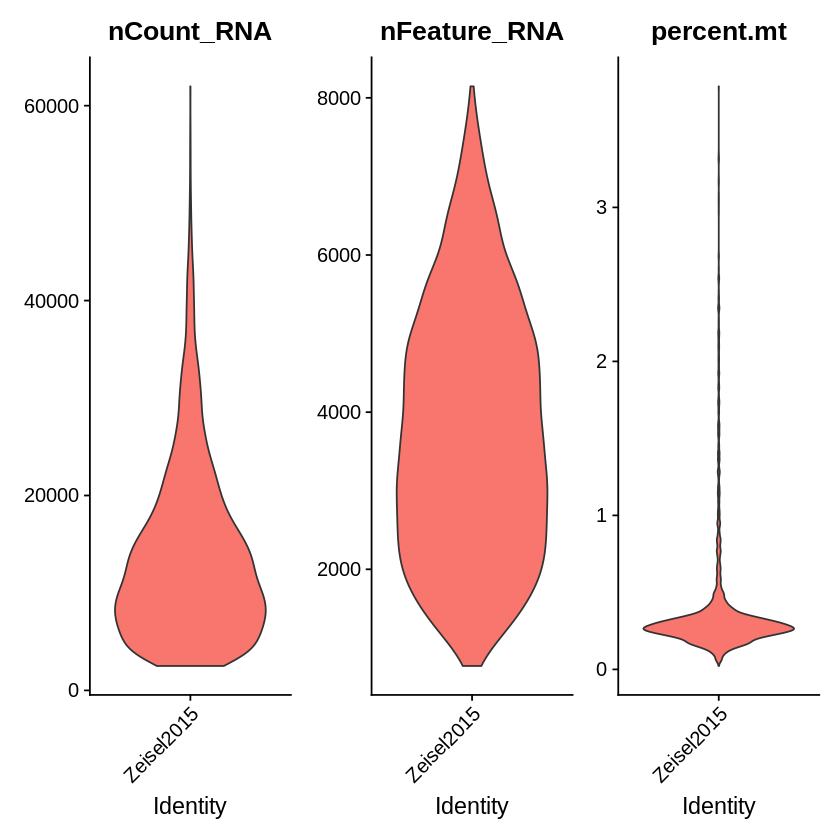

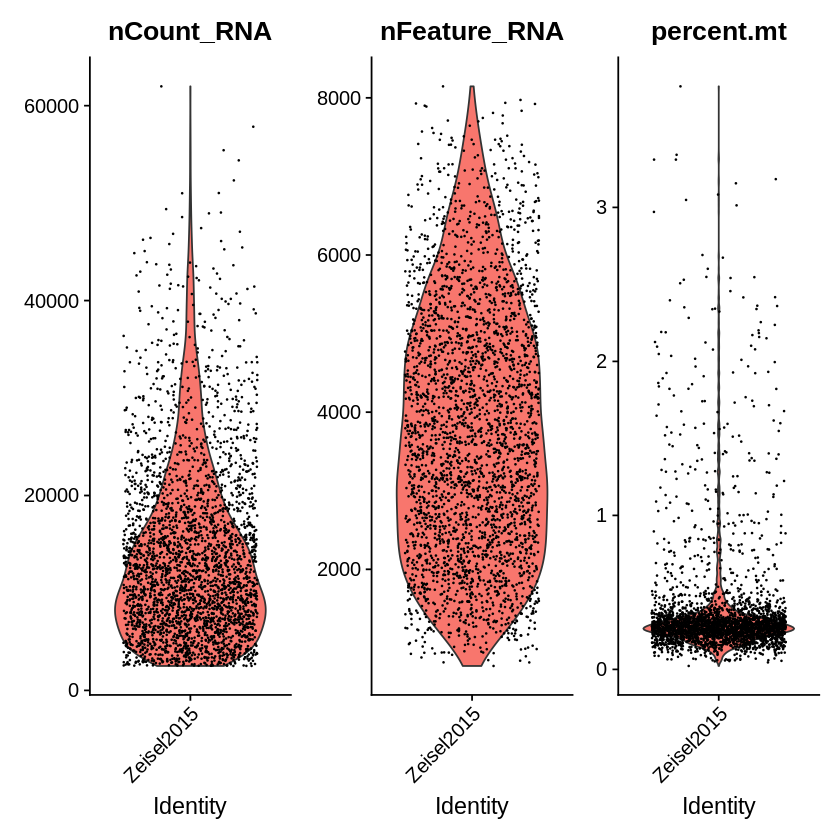

In [17]:
plt1<-VlnPlot(NGSE, features = c('nCount_RNA', 'nFeature_RNA', 'percent.mt'), pt.size=0)
plt2<-VlnPlot(NGSE, features = c('nCount_RNA', 'nFeature_RNA', 'percent.mt'), pt.size=0.1)
plt1
plt2

In [19]:
#Normalize the data
NGSE<- NormalizeData(NGSE, normalization.method='LogNormalize', scale.factor=10000)

In [20]:
NGSE

An object of class Seurat 
19972 features across 3005 samples within 1 assay 
Active assay: RNA (19972 features, 0 variable features)

In [21]:
#calculate and select 20000 most variable genes 
NGSE <- FindVariableFeatures(NGSE, selection.method = "vst", nfeatures = 2000)

In [22]:
##Scaling the data
all.genes<-rownames(NGSE)
NGSE<-ScaleData(NGSE, features=all.genes)

Centering and scaling data matrix


In [ ]:
## Principle Component Analysis (PCA)
# PCA summarises scRNA-seq matrix

In [23]:
NGSE<-RunPCA(NGSE, features=VariableFeatures(object=NGSE))

PC_ 1 
Positive:  Syn2, Vsnl1, Pgm2l1, Olfm1, Rbfox1, Hpca, Ppp3ca, Gabra1, Cck, Meg3 
	   Gria1, Elmod1, Mal2, Slc8a1, Syn1, Wasf1, Rasgrp1, Kcnd2, Cplx2, Tspan13 
	   Atp2b1, Cpne6, 3110035E14Rik, Mmd, Ndn, Pde1a, Gng3, Enc1, Eef1a2, Stxbp1 
Negative:  Npc2, Qk, Plp1, Gatm, Cd9, Trf, Cnp, Car2, Cmtm5, Sept4 
	   Mal, Ugt8a, Mag, Mbp, Cers2, Mobp, Cldn11, Gsn, Ermn, Mog 
	   Tspan2, Tmem88b, Elovl7, Arpc1b, Apod, Slc12a2, Gng5, Cryab, Pllp, Cd81 
PC_ 2 
Positive:  Mog, 2810468N07Rik, Mobp, Ugt8a, Hmgcs1, Mbp, Cnp, Mag, Tmem88b, Tmeff2 
	   Ermn, Gpr37, Cldn11, Qdpr, Efnb3, Cryab, Tspan2, Gstp1, Gsn, Pdlim2 
	   Enpp2, Opalin, Aspa, Cmtm5, Jam3, Nfasc, Pllp, Gjc3, Slc44a1, Gamt 
Negative:  B2m, Zfp36l1, Pltp, Srgn, Fcgrt, Gimap6, Ifitm3, Sparc, Ly6e, Esam 
	   Klf2, Clic1, Ier3, Itm2a, Cldn5, Hes1, Serpinh1, Igfbp7, Cyr61, Ly6c1 
	   Slco1a4, Slco2b1, Tm4sf1, Eltd1, Nfkbia, Arap3, Flt1, Abcb1a, Fn1, Apold1 
PC_ 3 
Positive:  Sparcl1, Id3, Slco1c1, Epas1, Slc38a3, Serpinh1, Slc2a1, Tm4s

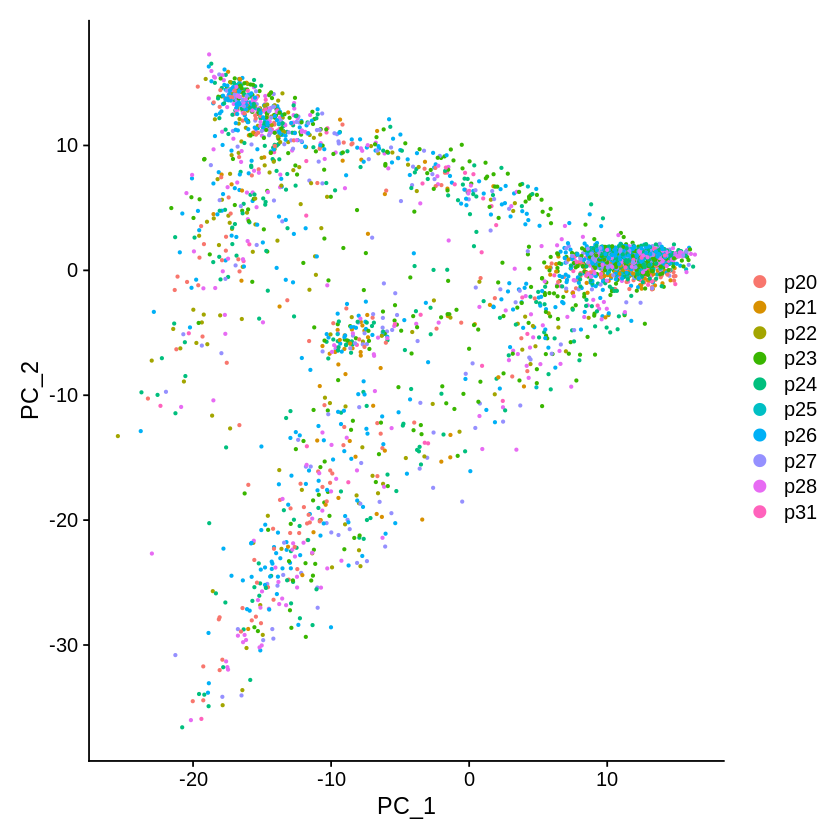

In [24]:
# check distribution of cells; age of cells is highlighted in different colours
Idents(NGSE)<-"Age"
pca<-DimPlot(NGSE, reduction='pca')
pca

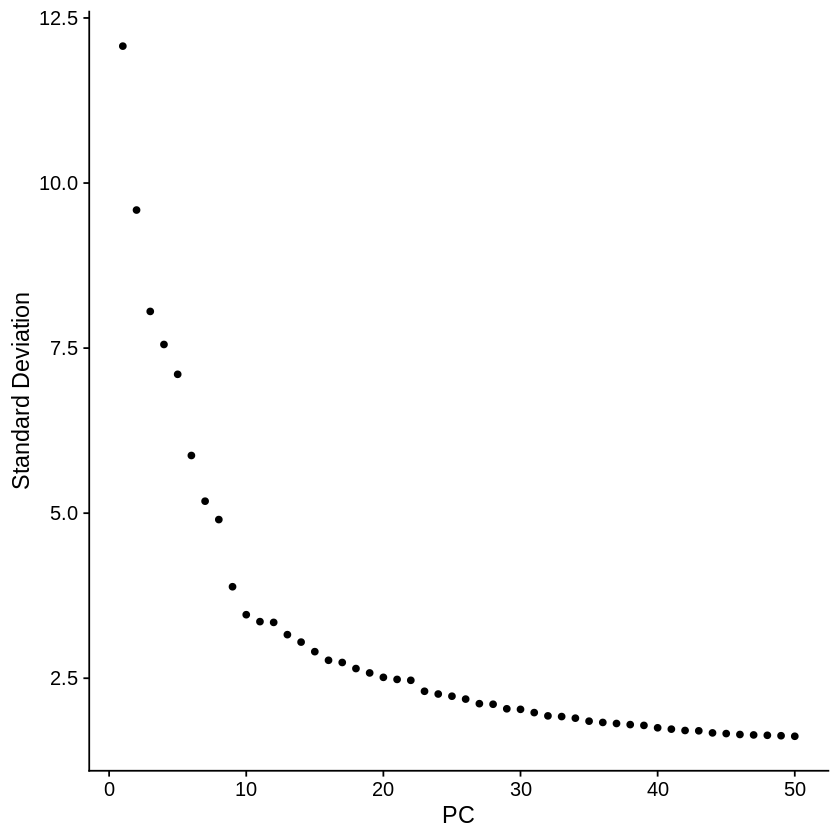

In [70]:
# Identify dimensionality for further calculation
# Elbowplot was used to identify relevant principle components

ElbowPlot<-ElbowPlot(NGSE,ndims=50)
ElbowPlot

In [25]:
##Cluster Cells with identified dimension; in this case 30
NGSE<- FindNeighbors(NGSE, dims=1:30)
NGSE<- FindClusters(NGSE, res=0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3005
Number of edges: 91491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9123
Number of communities: 16
Elapsed time: 0 seconds


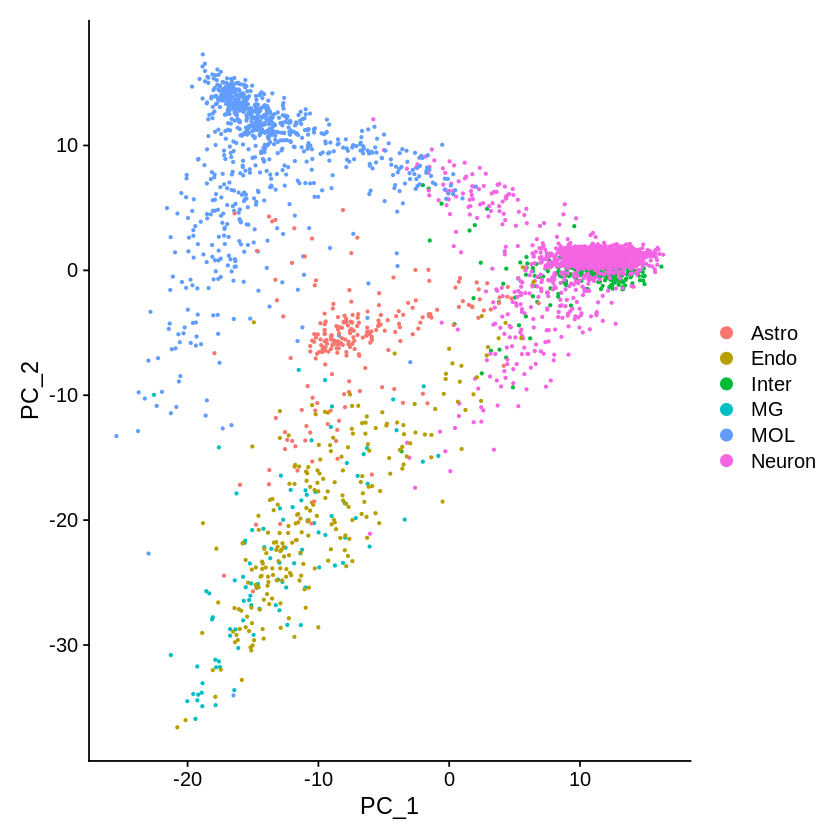

In [27]:
#pca plot with higlighted celltypes
pca_cell<-DimPlot(NGSE, reduction = 'pca')
pca_cell

In [76]:
#calculated clusters
Idents(NGSE)<- 'RNA_snn_res.0.5'
unique(Idents(NGSE))

[1] 6  5  15 9  10 4  7  3  0  8  2  1  11 13 14 12
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15

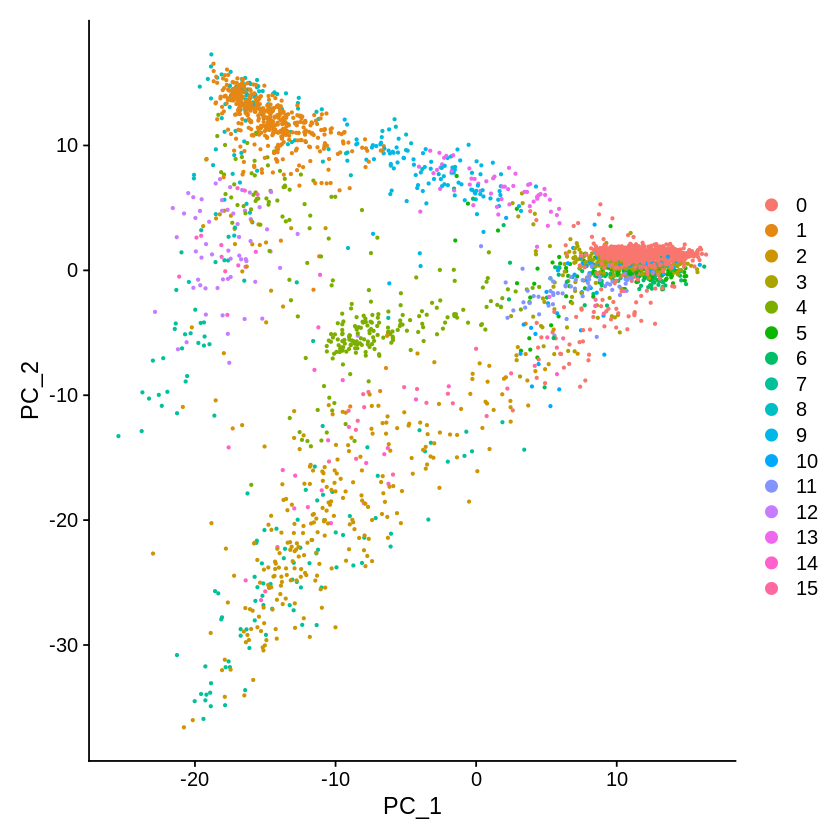

In [77]:
DimPlot(NGSE, reduction = 'pca')

In [ ]:
## Non-linear dimensional reduction: UMAP and tSNE
# 2D embedding based on close neighbors was further computed via 
# T-Distributed Stochastic Neighbour Embedding (t-SNE) or 
# Uniform Manifold Approximation and Projection (UMAP

In [28]:
NGSE<-RunUMAP(NGSE, dims=1:30, min.dist=0.5)
NGSE<-RunTSNE(NGSE, dims = 1:30, tsne.method = "Rtsne", nthreads = 4, max_iter = 2000)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”19:31:54 UMAP embedding parameters a = 0.583 b = 1.334
19:31:54 Read 3005 rows and found 30 numeric columns
19:31:54 Using Annoy for neighbor search, n_neighbors = 30
19:31:54 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
19:31:55 Writing NN index file to temp file /tmp/Rtmpk3tTO6/file1189c723c6b0b
19:31:55 Searching Annoy index using 1 thread, search_k = 3000
19:31:56 Annoy recall = 100%
19:31:56 Commencing smooth kNN distance calibration using 1 thread
19:31:56 Initializing from normalized Laplacian + noise
19:31:56 Commencing optimizatio

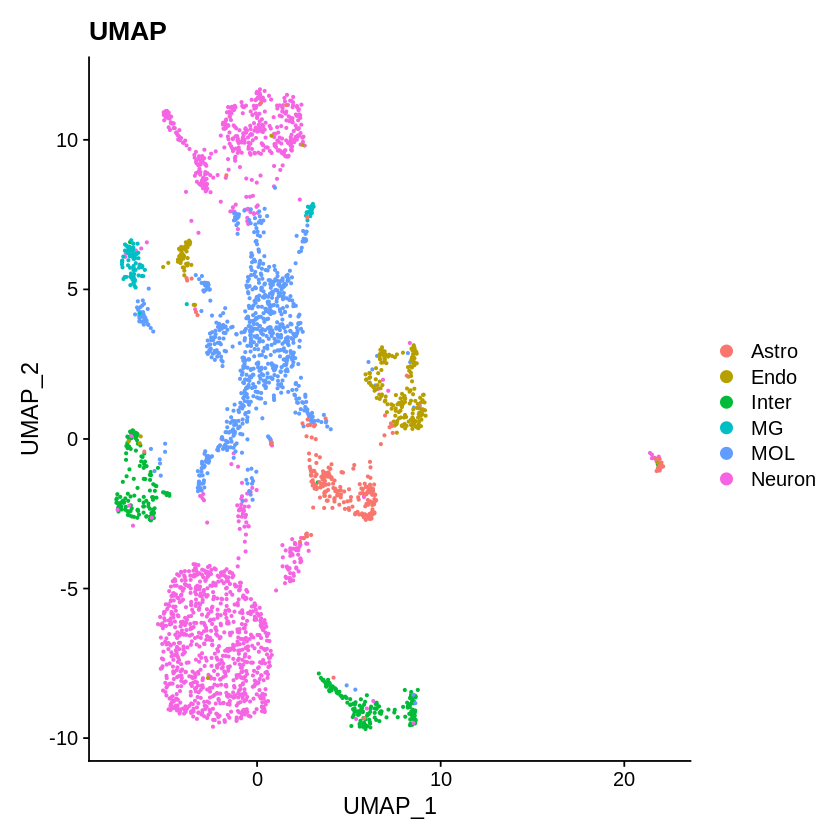

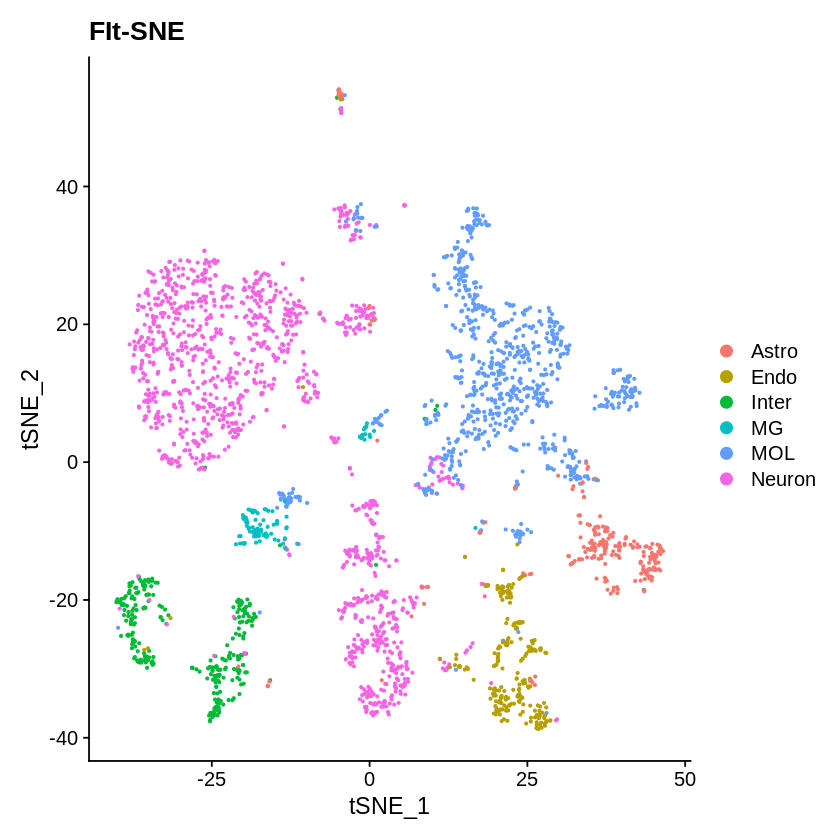

In [37]:
#UMAP and t-SNE plot highliting different cell types
Idents(NGSE)<-'CellType'
p2<-DimPlot(NGSE, reduction = "tsne", pt.size=0.5)+ ggtitle(label = "FIt-SNE")
p1<-DimPlot(NGSE, reduction = 'umap', pt.size=0.5) +ggtitle(label = 'UMAP')
p1 
p2


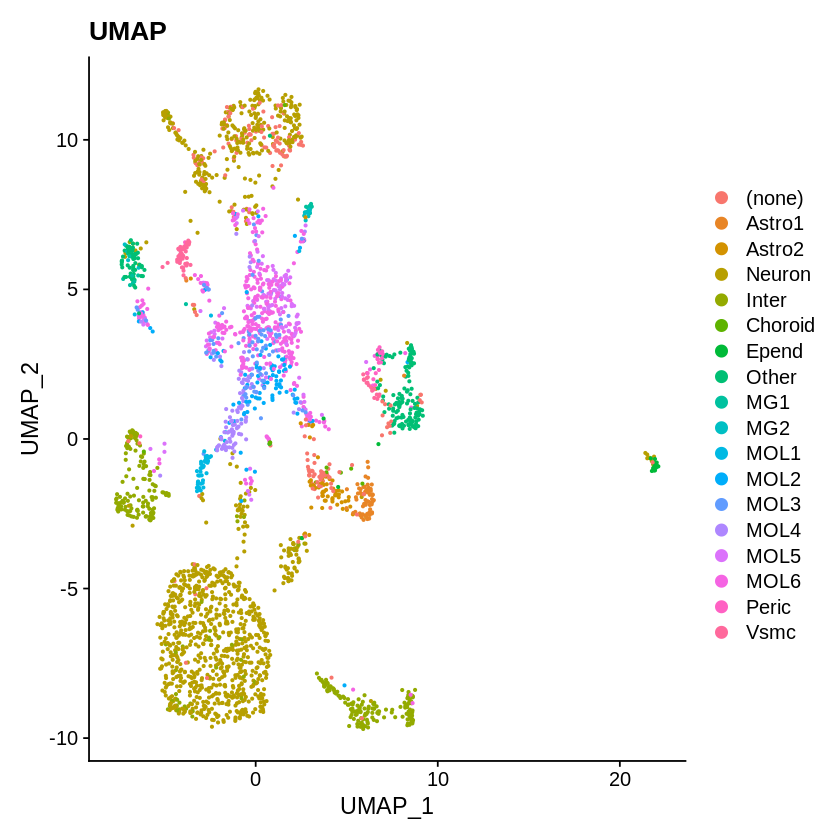

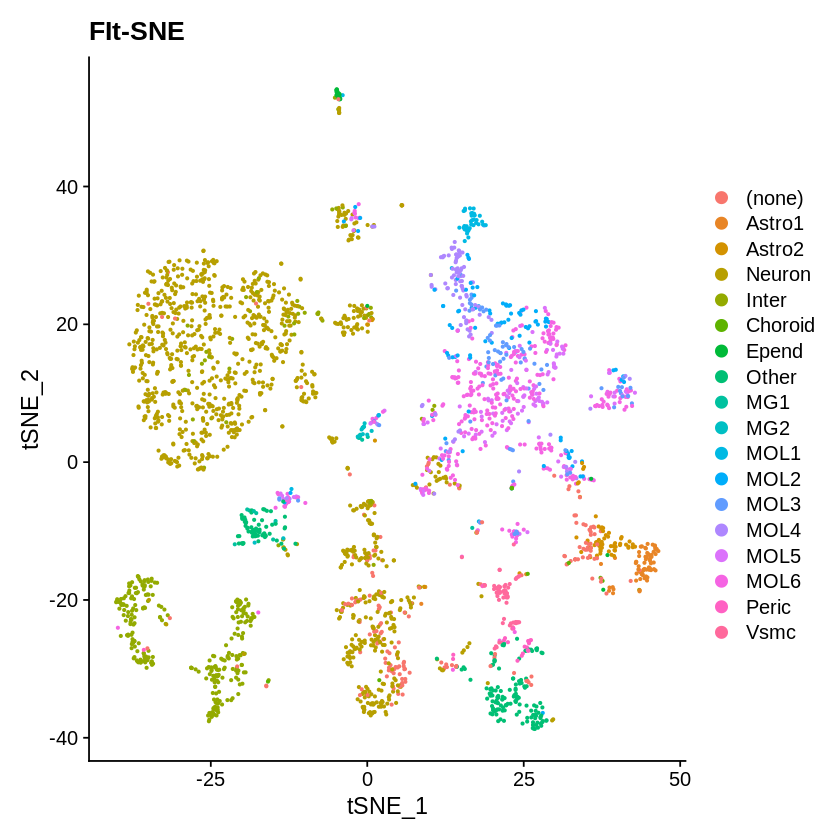

In [82]:
# UMAP & tSNE plot highlighting original celltype subcluster
Idents(NGSE)<-'CellTypeSubcluster'
p2<-DimPlot(NGSE, reduction = "tsne", pt.size=0.5)+ ggtitle(label = "FIt-SNE")
p1<-DimPlot(NGSE, reduction = 'umap', pt.size=0.5) +ggtitle(label = 'UMAP')
p1 
p2


In [ ]:
## OLG Marker Genes

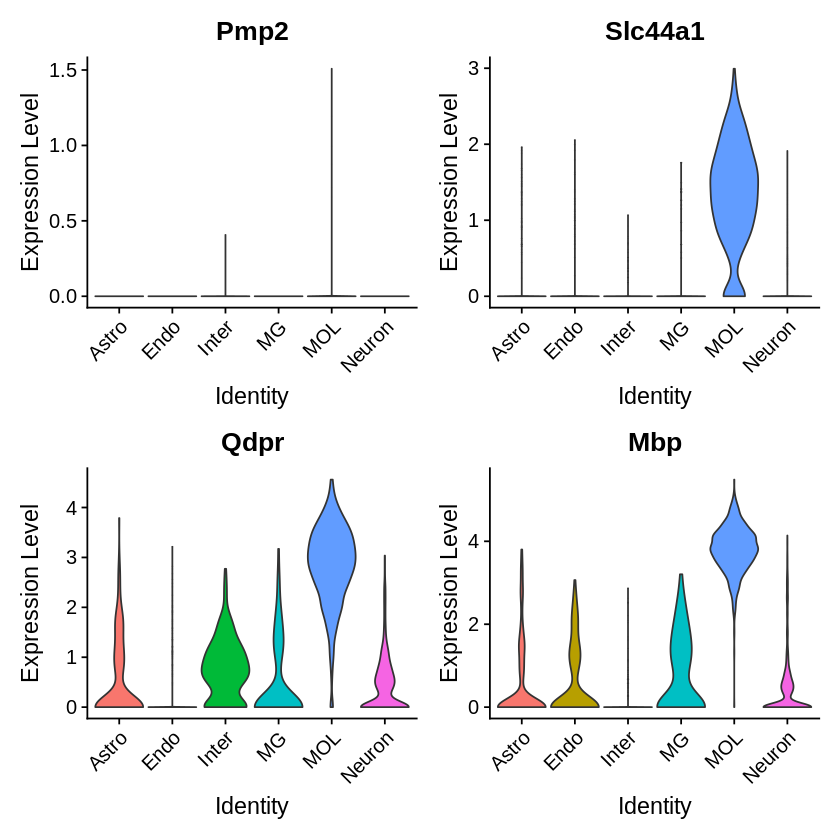

In [34]:
#Violin plots highlighting expression levels of OLG marker genes across all cell types

Idents(NGSE) <- "CellType"
Vln<-VlnPlot(NGSE,c("Pmp2", "Slc44a1", "Qdpr", "Mbp"),ncol=2, pt.size=0)
Vln

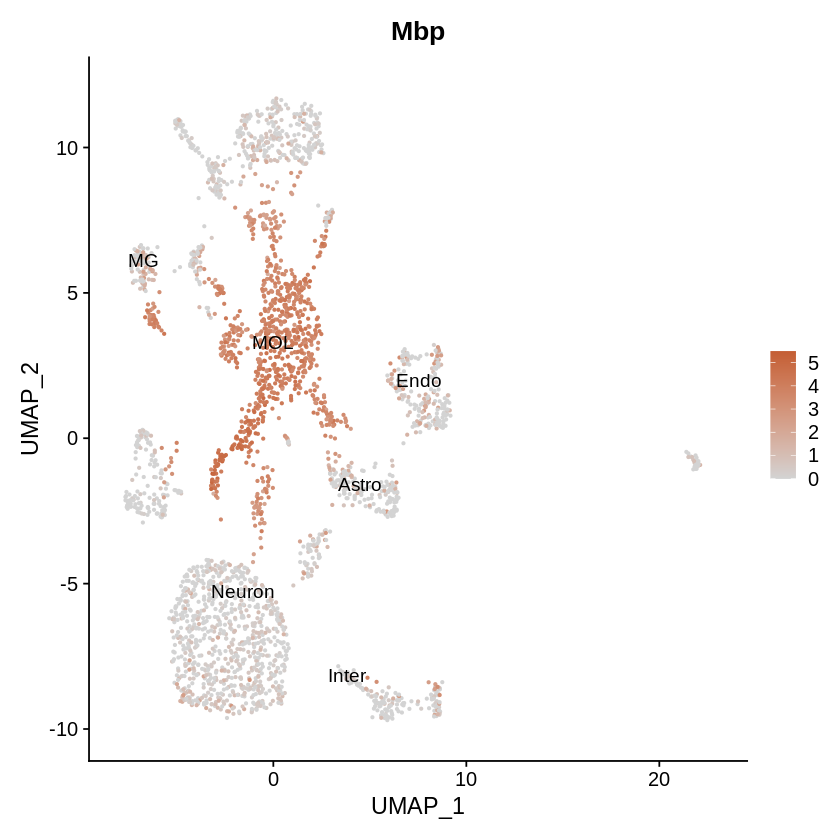

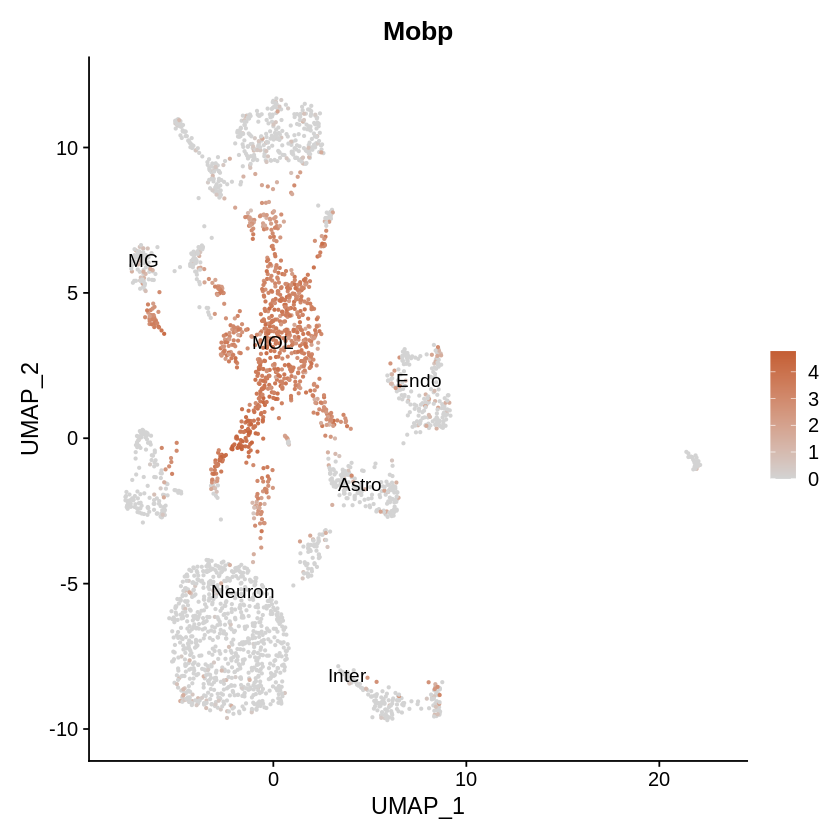

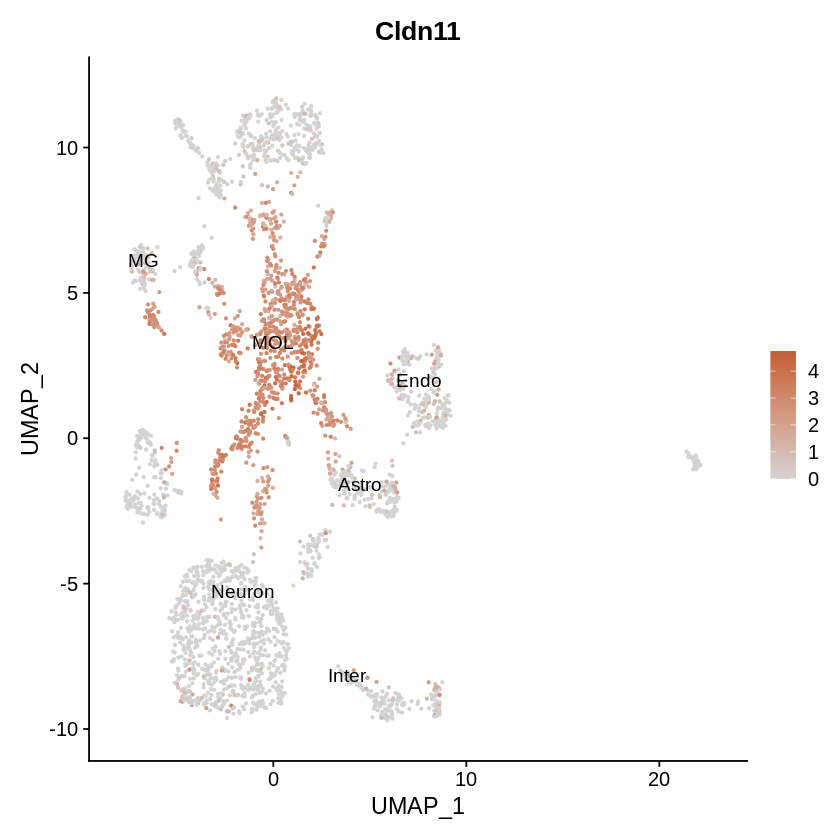

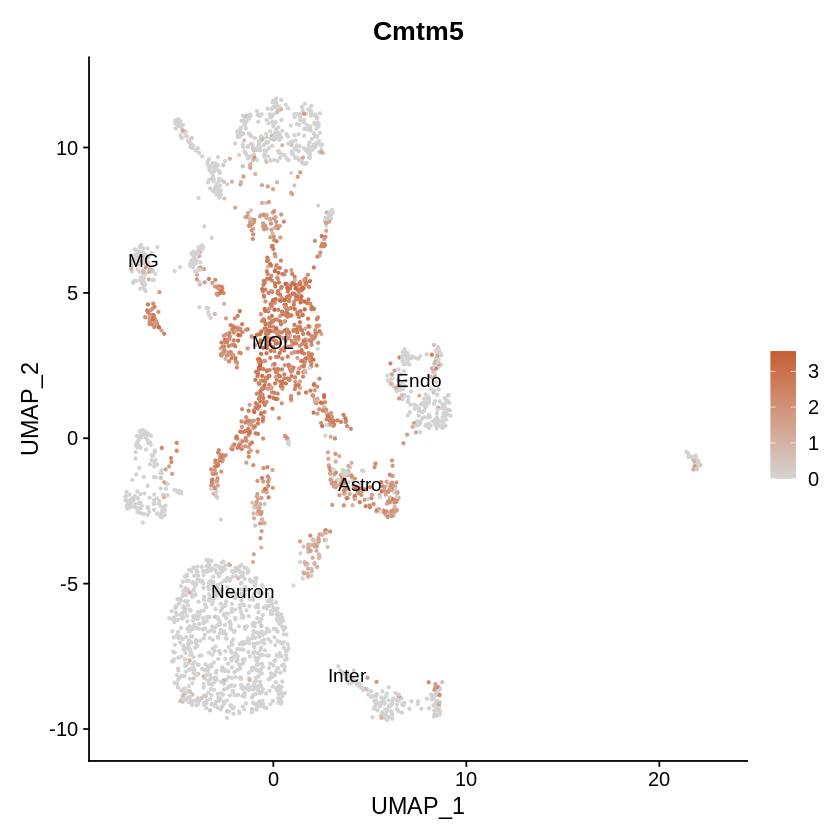

In [8]:
#UMAP plots highlighting expression levels of MOL marker genes across all cell types

DefaultAssay(NGSE)<-'RNA'
Idents(NGSE)<-'CellType'
MBP<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Mbp', cols=c('lightgrey', "#C45E34"))
CA2<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Car2', cols=c('lightgrey', "#C45E34"))
CMTM5<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Cmtm5', cols=c('lightgrey', "#C45E34"))
Mobp<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Mobp', cols=c('lightgrey', "#C45E34"))
Mog<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Mog', cols=c('lightgrey', "#C45E34"))
Cldn11<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Cldn11', cols=c('lightgrey', "#C45E34"))

#CA2
MBP
Mobp 
Cldn11 
CMTM5

#Mog


Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

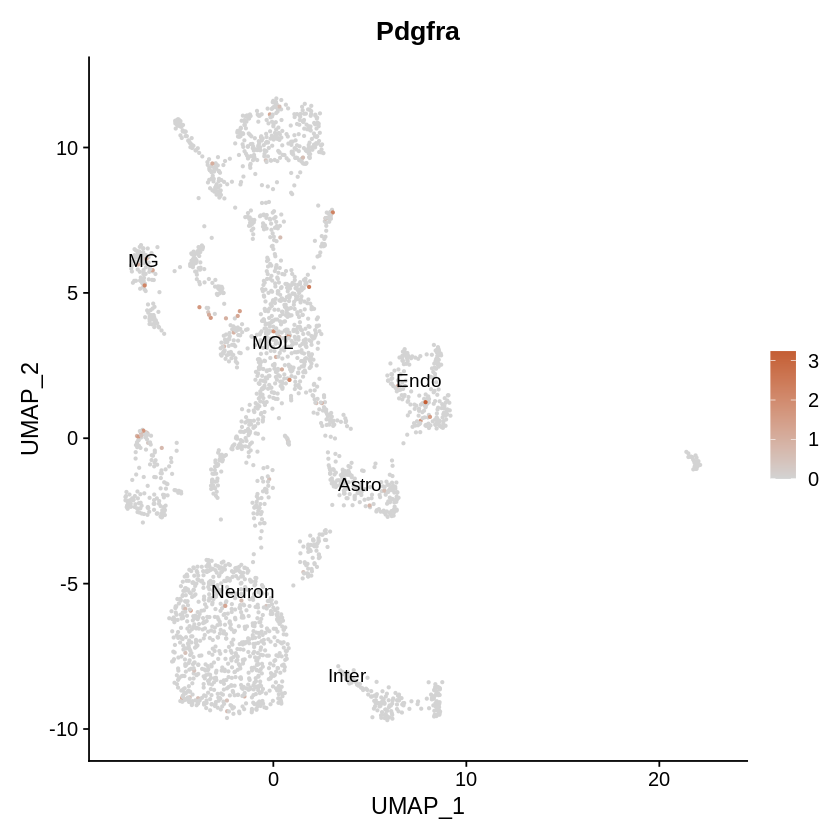

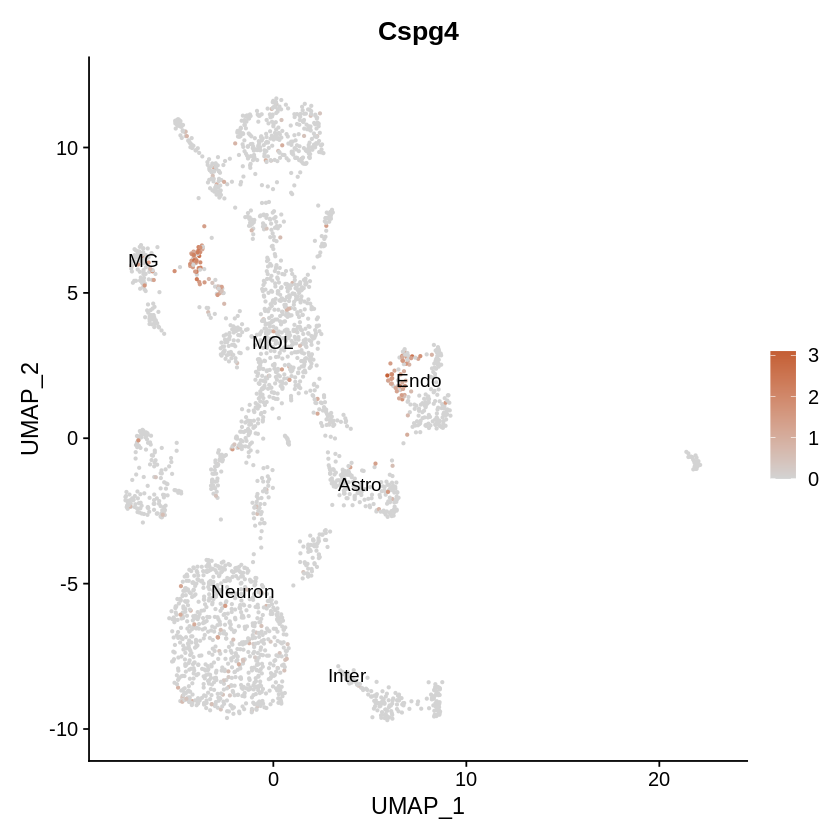

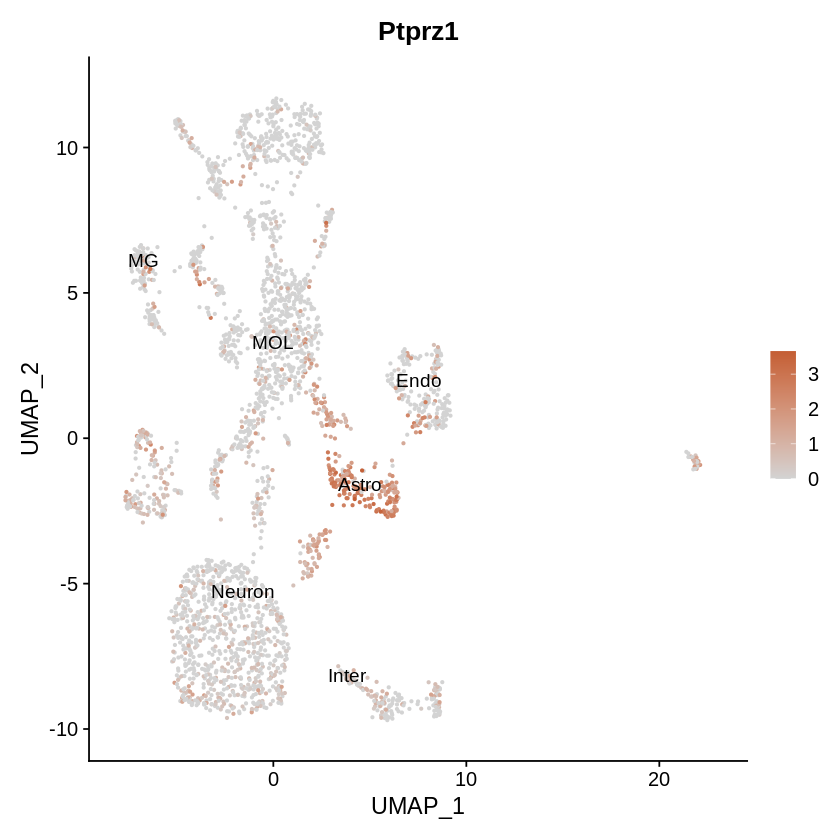

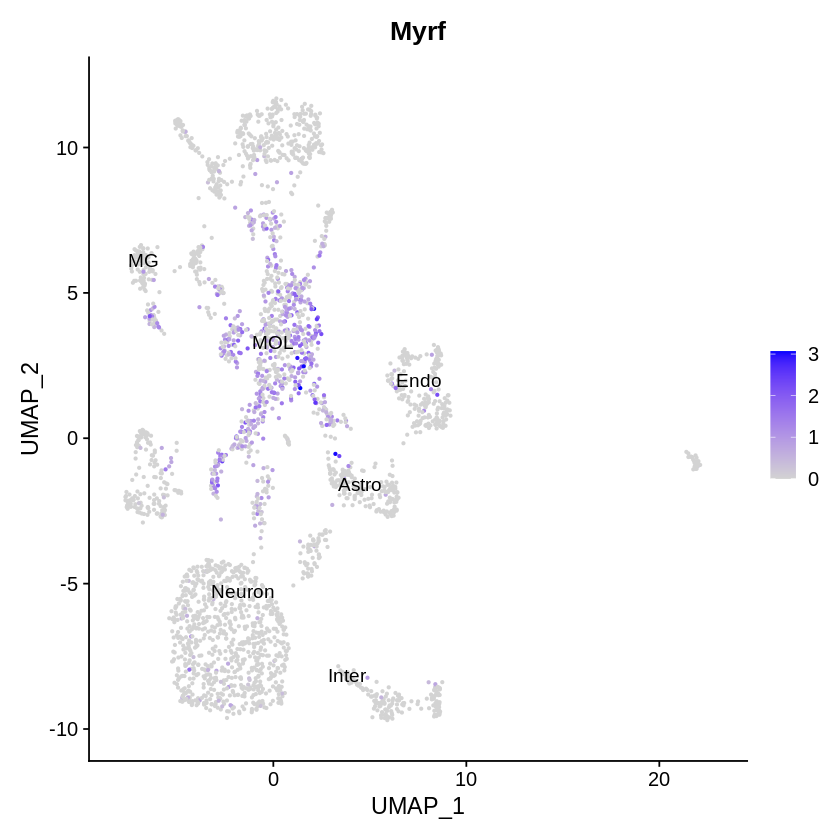

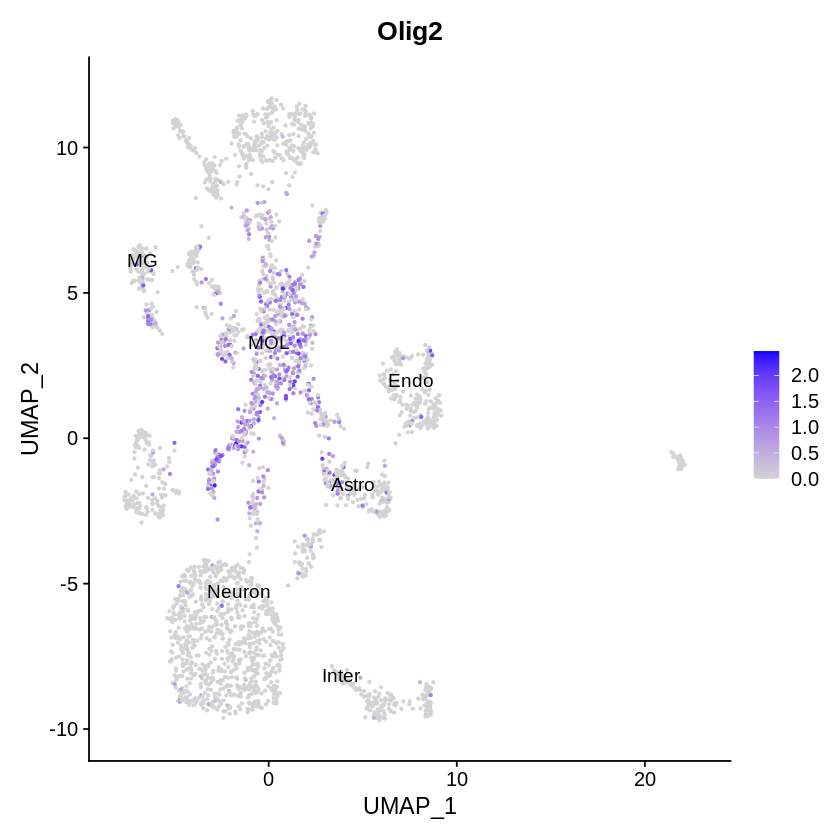

In [3]:
#Cellmarkers OPCs and NFOLs
Idents(NGSE)<-'CellType'
Pdgfra<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Pdgfra', cols=c('lightgrey', "#C45E34"))
Cspg4<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Cspg4', cols=c('lightgrey', "#C45E34"))
Ptprz1<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Ptprz1', cols=c('lightgrey', "#C45E34"))
Myrf<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Myrf')
Olig2<-FeaturePlot(NGSE,reduction='umap',label=TRUE, features = 'Olig2')

Pdgfra
Cspg4
Ptprz1
Myrf
Olig2

In [88]:
# number of different celltypes
table(NGSE@meta.data$CellType,
     NGSE@meta.data$orig.ident)
table(NGSE@meta.data$CellTypeSubcluster,
     NGSE@meta.data$orig.ident)

        
         Zeisel2015
  Other           0
  Astro         224
  Endo          235
  Inter         290
  MG             98
  MOL           820
  Neuron       1338

         
          Zeisel2015
  (none)         189
  Astro1          68
  Astro2          61
  Neuron        1180
  Inter          339
  Choroid         10
  Epend           20
  Other          202
  MG1             17
  MG2             16
  MOL1            45
  MOL2            98
  MOL3            87
  MOL4           106
  MOL5           125
  MOL6           359
  Peric           21
  Vsmc            62

In [89]:
#Find all markers of cluster 1
# minimum percentage of marker in respective group = 0.25
cluster1.markers<-FindMarkers(NGSE, ident.1="MOL", min.pct=0.25)
head(cluster1.markers, n=10)

p_val avg_logFC pct.1 pct.2 p_val_adj
Plp1  0     3.565442  1.000 0.607 0        
Trf   0     3.517234  0.984 0.182 0        
Mog   0     3.321296  0.989 0.112 0        
Mal   0     3.215560  0.967 0.265 0        
Apod  0     3.176842  0.946 0.168 0        
Ugt8a 0     2.983323  0.999 0.168 0        
Mbp   0     2.977533  0.999 0.397 0        
Mobp  0     2.893405  0.994 0.140 0        
Cnp   0     2.882332  0.999 0.241 0        
Ermn  0     2.874623  0.971 0.136 0

In [ ]:
# find markers for every cluster compared to all remaining cells, 
#report only the positive ones
NGSE.markers <- FindAllMarkers(NGSE, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
nGSE.markers %>% group_by(cluster) %>% top_n(n = 5, wt = avg_logFC)

In [90]:
# save processed dataset
saveRDS(NGSE, file = "/media/reuschenbach/Data/Masterthesis/MouseData/PreProcessed/JosiOrganizedSubset_MouseZeiselLinnarsson2015.rds")

In [ ]:
## SUBSET of OLG cells only
# following same script as above

In [6]:
Idents(NGSE)<-'CellTypeSubcluster'
OLG<-subset(NGSE, idents = c("MOL1", 'MOL2', 'MOL3', 'MOL4', 'MOL5', 'MOL6'))

In [7]:
head(OLG@meta.data)

orig.ident nCount_RNA nFeature_RNA CellType Condition Sex
ca1hippocampus.1065 Zeisel2015 14253      4105         MOL      4         -1 
ca1hippocampus.1066 Zeisel2015 29272      4612         MOL      4         0  
sscortex.563        Zeisel2015 14320      4172         MOL      4         -1 
sscortex.564        Zeisel2015  5375      1578         MOL      4         1  
sscortex.565        Zeisel2015 23509      4289         MOL      4         1  
sscortex.566        Zeisel2015 36376      5792         MOL      4         1  
                    Age cell_ID        CellTypeOriginal CellTypeSubcluster
ca1hippocampus.1065 p27 1772067057_G07 Zeisel_Oligo1    MOL1              
ca1hippocampus.1066 p26 1772067076_C07 Zeisel_Oligo1    MOL1              
sscortex.563        p24 1772067064_G07 Zeisel_Oligo1    MOL1              
sscortex.564        p26 1772067070_D08 Zeisel_Oligo1    MOL1              
sscortex.565        p20 1772058177_D03 Zeisel_Oligo1    MOL1              
sscortex.566        p28 1772067074_C07 Zeisel_Oligo1    MOL1              
                    percent.mt Tissue RNA_snn_res.0.5 seurat_clusters
ca1hippocampus.1065 0.2525784  CNS    8               8              
ca1hippocampus.1066 0.2118065  CNS    8               8              
sscortex.563        0.2863128  CNS    8               8              
sscortex.564        0.2418605  CNS    8               8              
sscortex.565        0.3062657  CNS    8               8              
sscortex.566        0.2529140  CNS    8               8              
                    Study     
ca1hippocampus.1065 Zeisle2015
ca1hippocampus.1066 Zeisle2015
sscortex.563        Zeisle2015
sscortex.564        Zeisle2015
sscortex.565        Zeisle2015
sscortex.566        Zeisle2015

In [ ]:
# Quality control 
# percentage of mitochondrial RNA and number of RNA  and number of different RNA

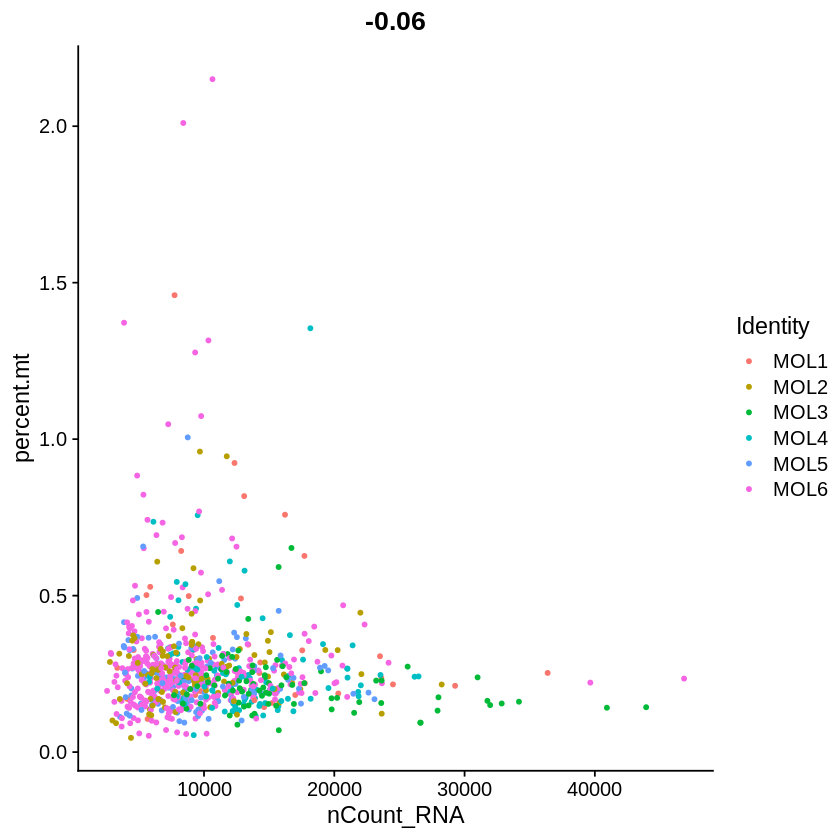

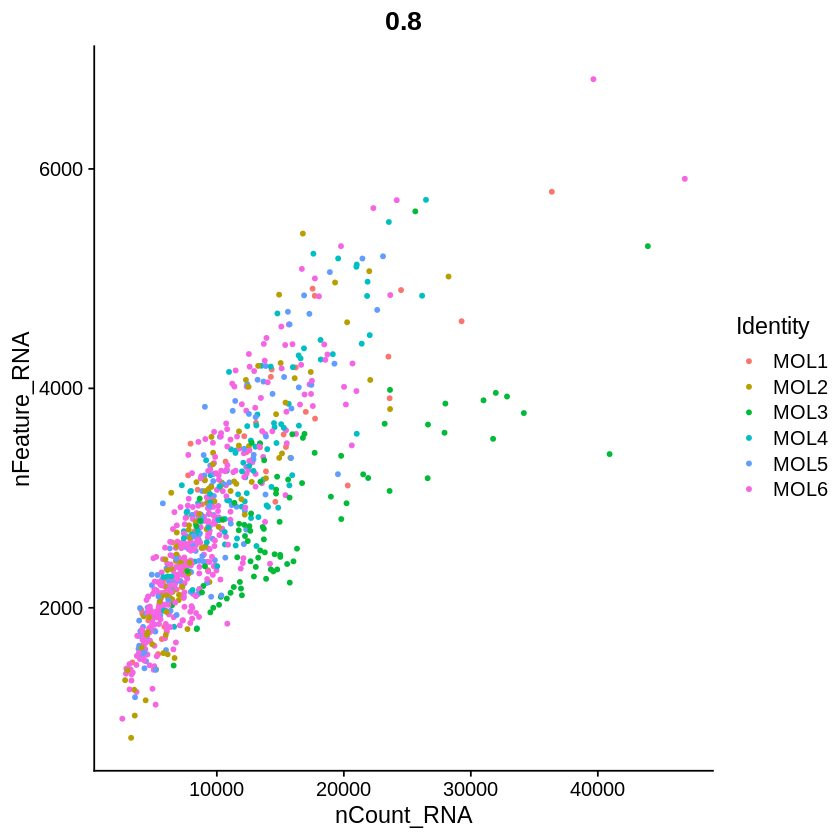

In [8]:
#pre-processing
plot1 <- FeatureScatter(OLG, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(OLG, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 
plot2

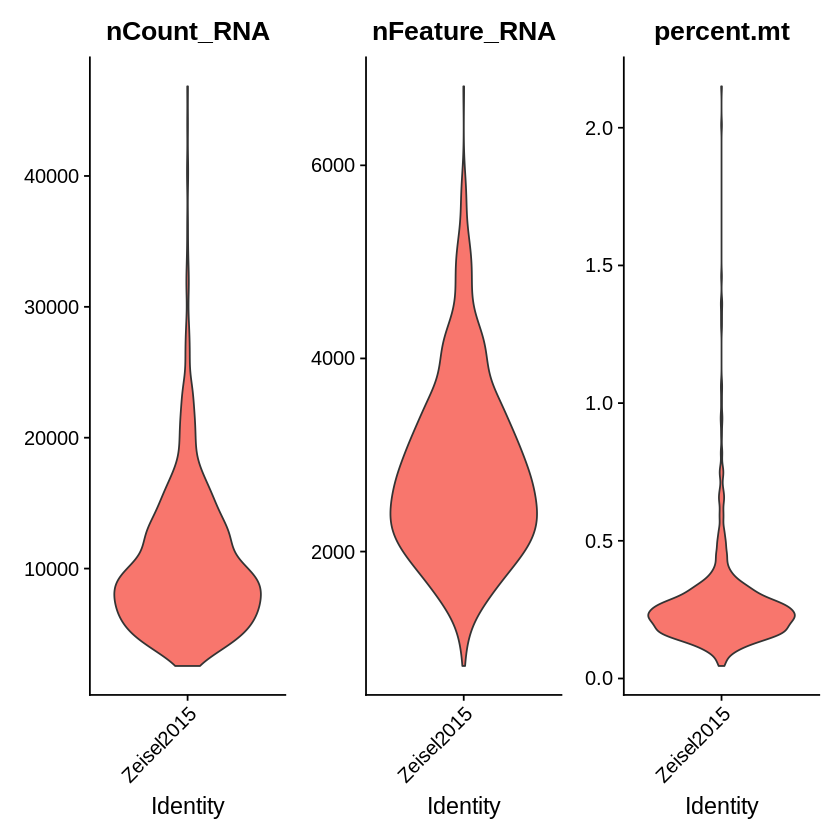

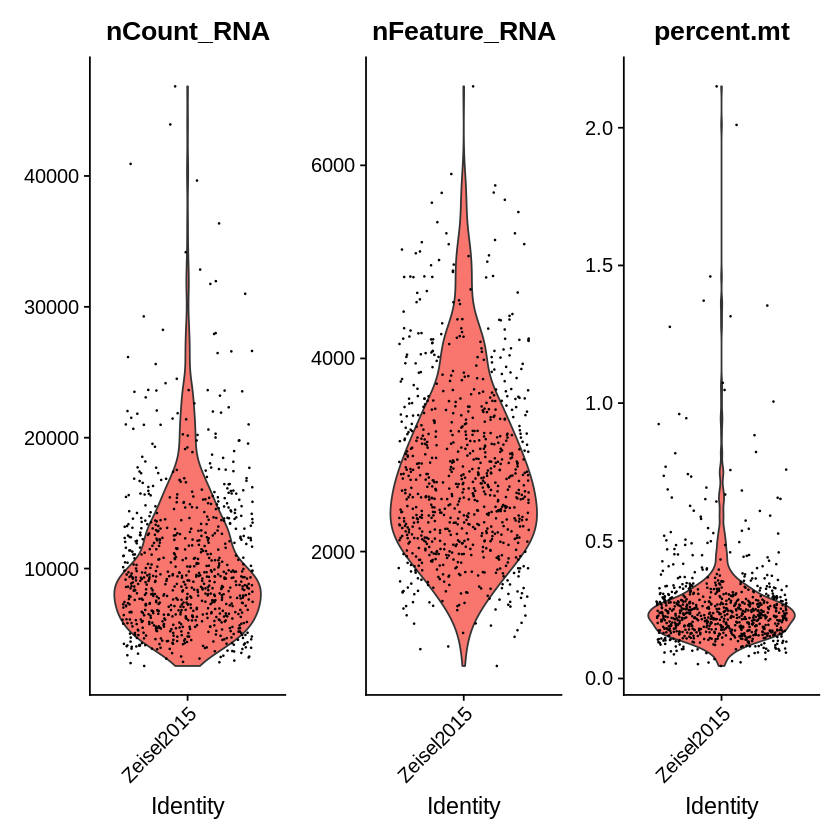

In [10]:
Idents(OLG)<-"orig.ident"
plt1OLG<-VlnPlot(OLG,features = c('nCount_RNA', 'nFeature_RNA', 'percent.mt'), pt.size=0)
plt2OLG<-VlnPlot(OLG,features = c('nCount_RNA', 'nFeature_RNA', 'percent.mt'), pt.size=0.1)

plt1OLG
plt2OLG

In [12]:
#Normalizing new subset
OLG<-NormalizeData(OLG, normalization.method = "LogNormalize", scale.factor = 10000)

In [13]:
#Find 2000 most variable genes in OLG subset
OLG<-FindVariableFeatures(OLG, selection.method='vst', nfeatures=2000)

In [14]:
##Scaling the data
all.genes<-rownames(OLG)
OLG<-ScaleData(OLG, features=all.genes)

Centering and scaling data matrix


In [15]:
#perform PCA on new subset
OLG<-RunPCA(OLG, features=VariableFeatures(object=OLG))

PC_ 1 
Positive:  Enpp2, Mag, Cldn11, Cd9, Olig1, Eef1a1, Gstp1, Gng12, H3f3b, Fa2h 
	   Anln, Clic4, Gm9846, Jun, Ccl7, Ctsc, Metrn, Anxa5, Stab1, Evi2a 
	   Rps26, Sepp1, Grb14, Mrc1, Ankrd28, Ctsl, Cbr2, Smco3, Pf4, Ccl2 
Negative:  Snhg11, Snap25, Scn2a1, Ndrg4, Syt1, Meg3, Stmn2, Cx3cl1, Grin2b, Atp1b1 
	   Rtn1, Pcsk2, Chn1, Celf4, Thy1, Atp2b2, Prkcb, Kalrn, Olfm1, Arpp21 
	   Dlgap1, Grm5, Camk2a, Syp, Gabra1, Gria2, Stmn3, Ttc3, Adcy1, Rbfox1 
PC_ 2 
Positive:  Mag, Cldn11, Olig1, Enpp2, Nfasc, Ank3, Sh3gl3, Sirt2, Opalin, Kndc1 
	   Plekha1, Tspan15, Sema6a, Cpox, Ctps, Serinc5, Lrrtm2, Hsd17b7, Rap2a, Smco3 
	   Ubl3, Dpysl2, Plat, Ddr1, Tmem163, Ddx3y, Nudt4, Fam214a, Usp22, Gpr17 
Negative:  B2m, Fcgrt, Ly6e, Ifitm3, Ctsc, Zfp36l1, Srgn, Gimap6, Ier3, Lgals1 
	   Cyba, Stab1, Tyrobp, Pltp, Txnip, Cbr2, Dab2, Cfh, Slco2b1, Pf4 
	   C1qb, Rnase4, Klf2, Fcgr3, Mrc1, Ccl7, Hes1, Lyz2, Fcrls, C1qa 
PC_ 3 
Positive:  Tyrobp, C1qb, Pf4, Fcrls, Mrc1, Lyz2, Ms4a7, C1qa, Csf1r, Fcgr

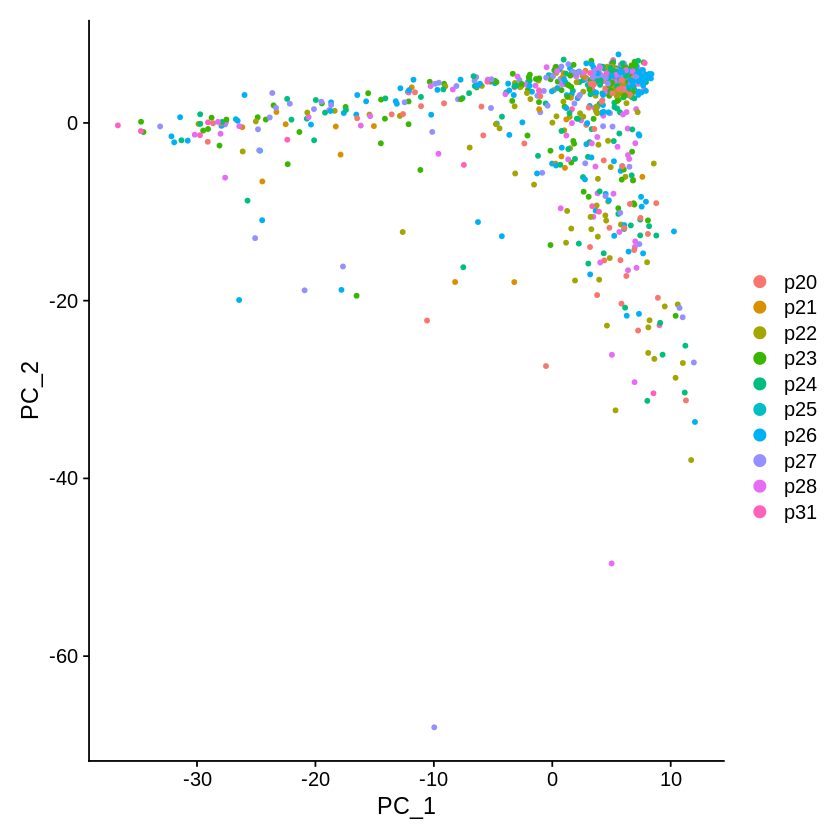

In [16]:
#pca plot highlighting different age groups
Idents(OLG)<-"Age"
pca_OLGage<-DimPlot(OLG, reduction = "pca")
pca_OLGage

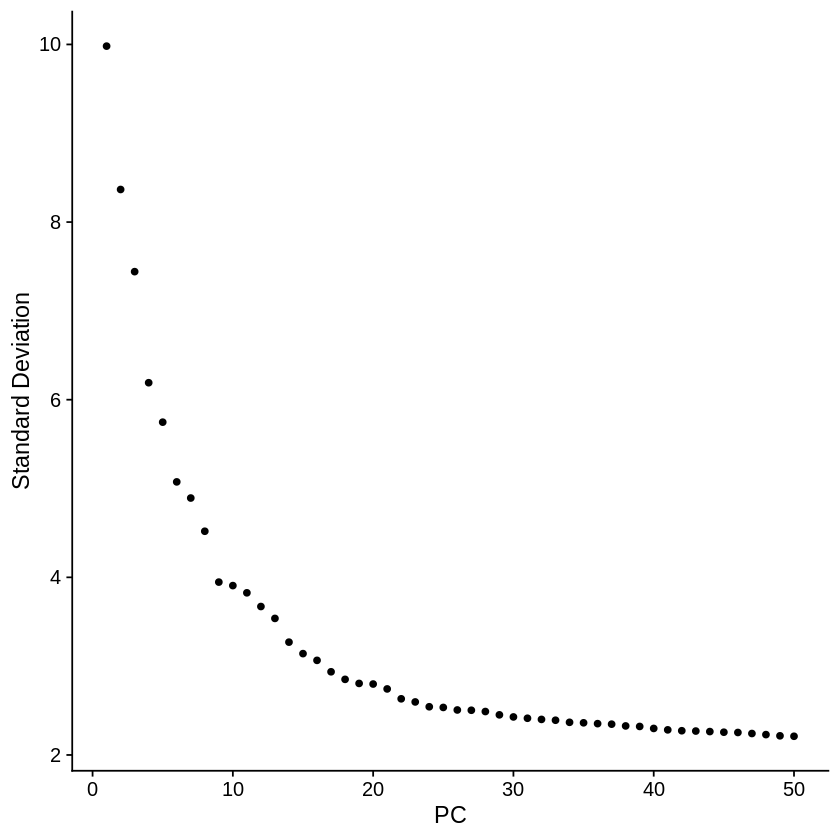

In [18]:
# Elbowplot for identifying relevant principle components
ElbowPlot_OLG<-ElbowPlot(OLG, ndims=50)
ElbowPlot_OLG

In [20]:
##Cluster Cells with identified dimension; in this case 22

OLG <- FindNeighbors(OLG, dims = 1:22)
OLG <- FindClusters(OLG, resolution = 0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 820
Number of edges: 24919

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8274
Number of communities: 9
Elapsed time: 0 seconds


In [21]:
Idents(OLG)<-'RNA_snn_res.0.5'
unique(Idents(OLG))

[1] 2 1 3 6 0 8 4 7 5
Levels: 0 1 2 3 4 5 6 7 8

In [ ]:
## Non-linear dimensional reduction: UMAP and tSNE
# 2D embedding based on close neighbors was further computed via 
# T-Distributed Stochastic Neighbour Embedding (t-SNE) or 
# Uniform Manifold Approximation and Projection (UMAP

In [22]:
OLG <- RunUMAP(OLG, dims = 1:22)
OLG <- RunTSNE(OLG, dims = 1:22, tsne.method = "Rtsne", nthreads = 4, max_iter = 2000)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”19:29:23 UMAP embedding parameters a = 0.9922 b = 1.112
19:29:23 Read 820 rows and found 22 numeric columns
19:29:23 Using Annoy for neighbor search, n_neighbors = 30
19:29:23 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
19:29:23 Writing NN index file to temp file /tmp/RtmpNV9ily/file1101c63bce817
19:29:23 Searching Annoy index using 1 thread, search_k = 3000
19:29:23 Annoy recall = 100%
19:29:23 Commencing smooth kNN distance calibration using 1 thread
19:29:24 Initializing from normalized Laplacian + noise
19:29:24 Commencing optimizatio

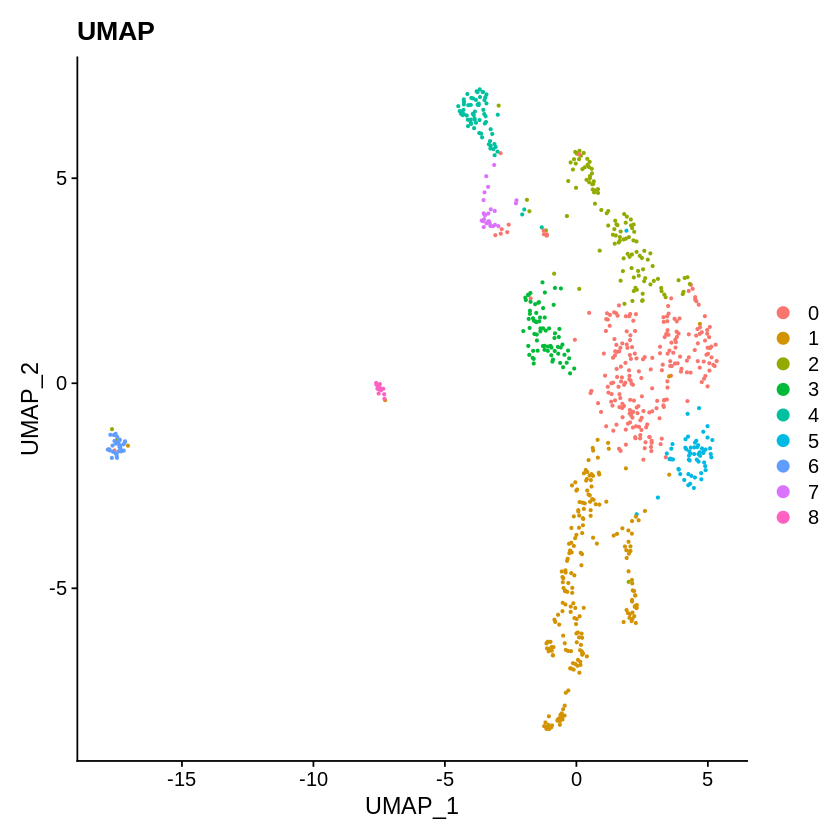

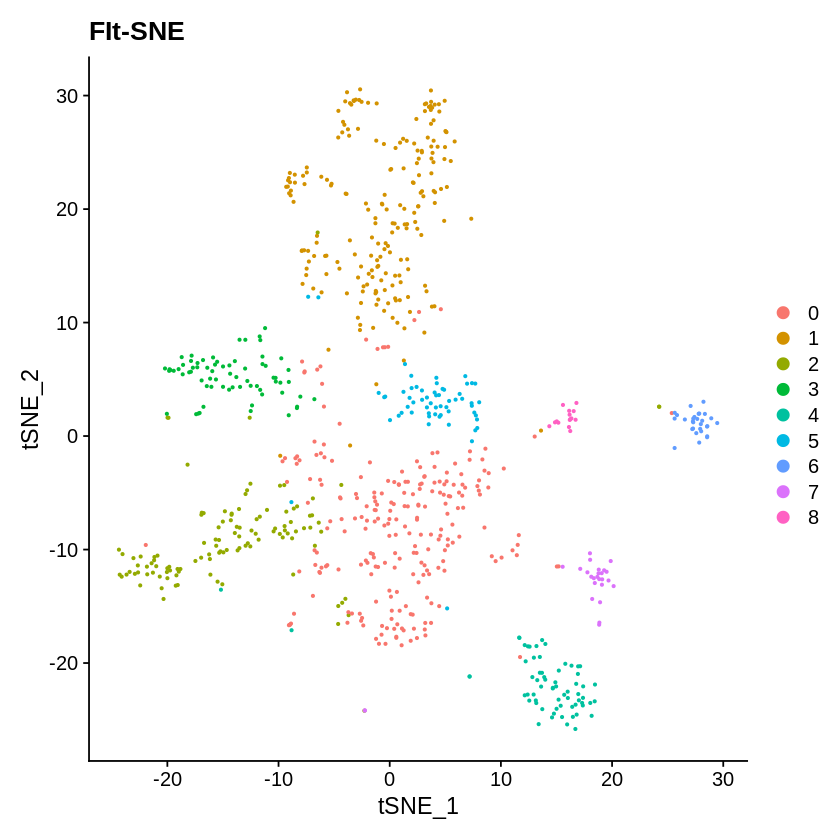

In [23]:
# UMAP and t-SNE plot highlithing calculated clusters
p2<-DimPlot(OLG, reduction = "tsne", pt.size=0.5)+ ggtitle(label = "FIt-SNE")
p1<-DimPlot(OLG, reduction = "umap", pt.size=0.5)+ ggtitle(label = "UMAP")
p1
p2

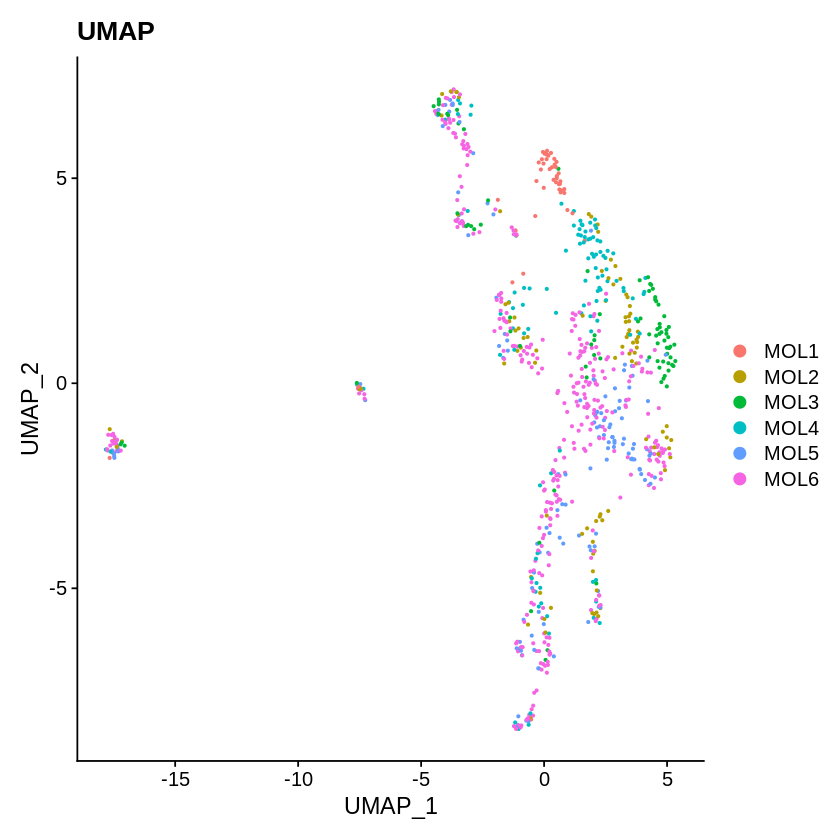

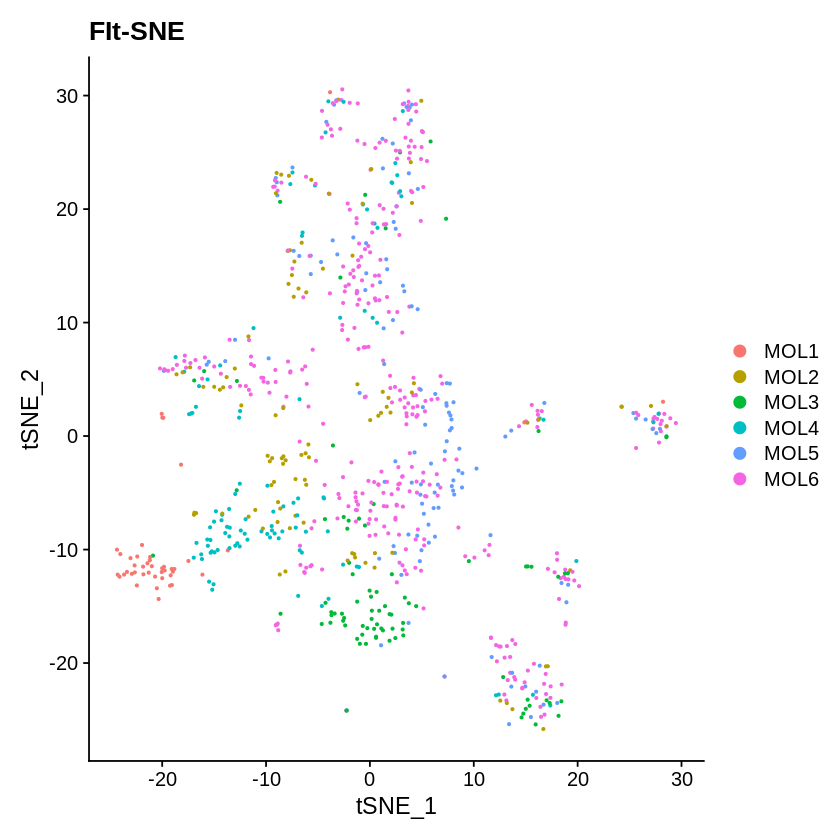

In [24]:
#UMAP and t-SNE plots highligthing MOL subclusters
Idents(OLG)<-'CellTypeSubcluster'
p2<-DimPlot(OLG, reduction = "tsne", pt.size=0.5)+ ggtitle(label = "FIt-SNE")
p1<-DimPlot(OLG, reduction = "umap", pt.size=0.5)+ ggtitle(label = "UMAP")
p1
p2

In [26]:
saveRDS(OLG, file = "/media/reuschenbach/Data/Masterthesis/MouseData/PreProcessed/JosiOrganizedSubsetOLG_MouseZeiselLinnarsson2015.rds")

In [2]:
OLG<-readRDS("/media/reuschenbach/Data/Masterthesis/MouseData/PreProcessed/JosiOrganizedSubsetOLG_MouseZeiselLinnarsson2015.rds")

In [28]:
OLG
NGSE

An object of class Seurat 
19972 features across 820 samples within 1 assay 
Active assay: RNA (19972 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

An object of class Seurat 
19972 features across 3005 samples within 1 assay 
Active assay: RNA (19972 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne